# FEV23 Rakuten Bootcamp

## Mise en place

Chargement des librairies et des données.

In [2]:
# Version de Python utilisée : 3.9.xx
# Import des librairies 
import matplotlib.pyplot as plt
from matplotlib import gridspec
import pandas as pd
import numpy as np
import seaborn as sns
from pathlib import Path
import imagesize
from PIL import Image

sns.set_theme()


In [3]:
import sys
sys.path.append("..")

from src.data import data, analysis


DATA_DIR = "../data"
df = data.load_data(DATA_DIR)
df_images = analysis.get_img_information(DATA_DIR)

## Analyse des données

### Analyse des images

#### Qualité des images

Affichage du compte, the la moyenne et de l'écart-type de la largeur, hauteur et du ratio des images.

Nous constatons que toutes les images sont de même taille.

In [4]:
# Display the count, average and std of all the images
df_images[["Width", "Height", "Aspect Ratio"]].describe().iloc[:3]

Width   Height  Aspect Ratio
count  84916.0  84916.0       84916.0
mean     500.0    500.0           1.0
std        0.0      0.0           0.0

#### Affichage d'images aléatoires

1 3


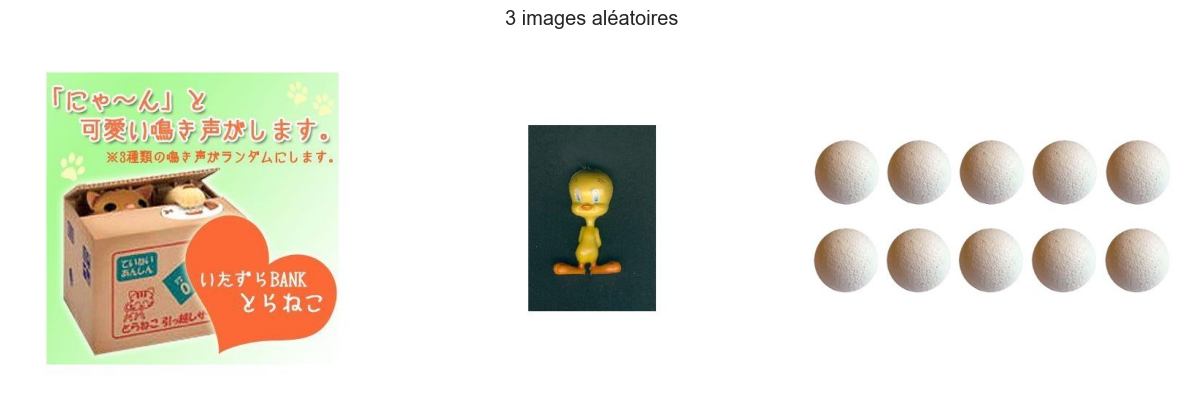

In [5]:
analysis.display_random_img(DATA_DIR, nb_img=3, df=df)

#### Images aléatoires dans chaque catégorie

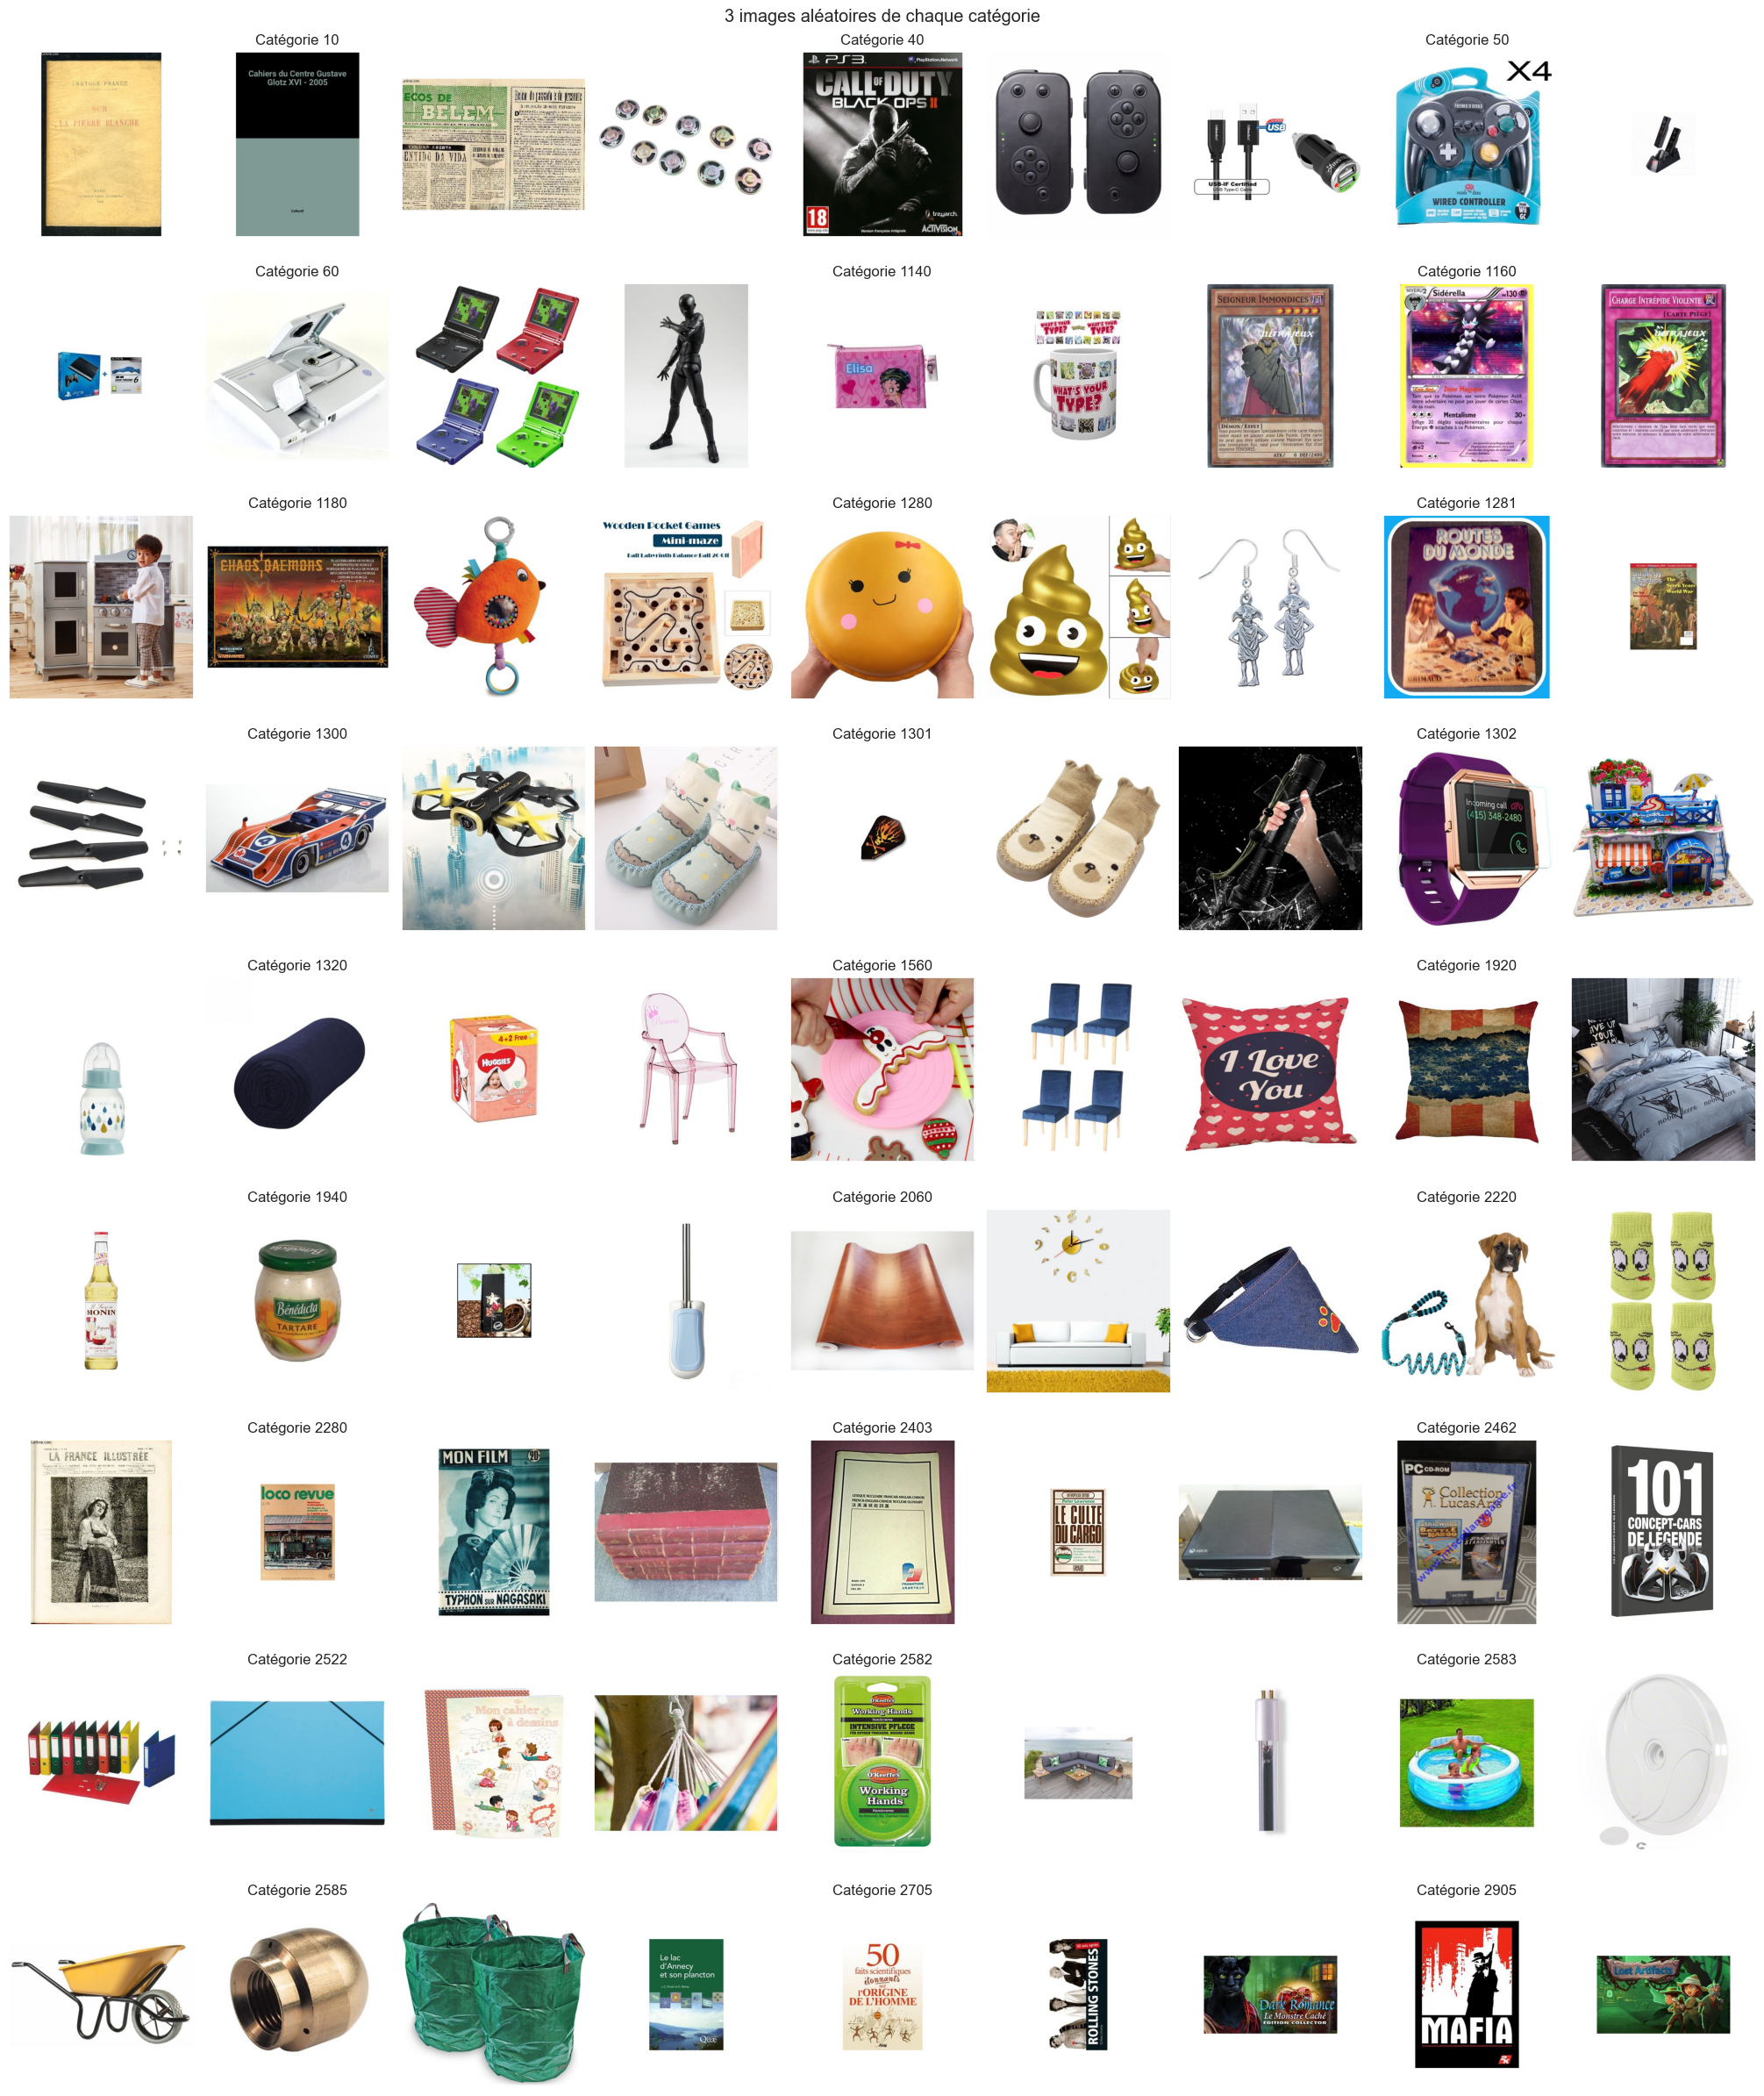

In [7]:
TOP_CATEGORIES = 27
IMAGES_PER_CATEGORY = 3

def get_images_per_category(n):
    """
    Return n images per category.

    Arguments:
    n: int - Number of images per category.

    Returns:
    A DataFrame containing 2 columns: prdtypecode, imagename.
    """
    # df_words.groupby("prdtypecode").value_counts().groupby(level=0).head(n).to_frame()
    images_per_category = df.groupby("prdtypecode").value_counts().groupby(level=0).sample(n).to_frame()
    images_per_category = images_per_category.reset_index()
    images_per_category = images_per_category.drop(0, axis=1)
    images_per_category["imagename"] = [get_image_name(productid, imageid) for productid, imageid in zip(images_per_category["productid"], images_per_category["imageid"])]
    return images_per_category.drop(["designation", "description", "productid", "imageid"], axis=1)

def get_rows_cols(nb_items:int, max_col:int = 3) -> tuple:
    if(nb_items <= max_col):
        return (1,nb_items)
    cols = max_col
    if(nb_items%max_col == 0):
        rows = nb_items//max_col
    else:
        rows = nb_items//max_col + 1
    return (rows, cols)

def format_axes(fig: plt.Figure):
    for ax in fig.axes:
        ax.set_xticks([])
        ax.set_yticks([])
        #ax.grid(False)
        ax.set_aspect(1)

df_img_per_category = get_images_per_category(3)

fig = plt.figure(figsize=(20, 24), layout="constrained")
rows, cols = get_rows_cols(TOP_CATEGORIES)
gs_cat = gridspec.GridSpec(rows, cols, figure=fig)
#gs_cat.tight_layout(fig)
i = 0
for i, prdtypecode in enumerate(df_img_per_category["prdtypecode"].unique()):
    type_images = df_img_per_category[df_img_per_category["prdtypecode"] == prdtypecode]["imagename"]

    gs_img = gridspec.GridSpecFromSubplotSpec(1, IMAGES_PER_CATEGORY, subplot_spec=gs_cat[i])
    j = 0
    as_title = False
    for j, imagename in enumerate(type_images):
        ax = fig.add_subplot(gs_img[j])
        if(as_title == False and (IMAGES_PER_CATEGORY // (j+1) == IMAGES_PER_CATEGORY // 2)):
            ax.set_title("Catégorie " + str(prdtypecode))
            as_title = True
        img = np.asarray(Image.open(IMG_DIR + imagename))
        ax.imshow(img)
        j+=1
    i+=1

format_axes(fig)
fig.suptitle(f"{NB_IMAGES} images aléatoires de chaque catégorie");
plt.show()


### Afficher 5 images d'une catégorie

[  10   40   50   60 1140 1160 1180 1280 1281 1300 1301 1302 1320 1560
 1920 1940 2060 2220 2280 2403 2462 2522 2582 2583 2585 2705 2905]


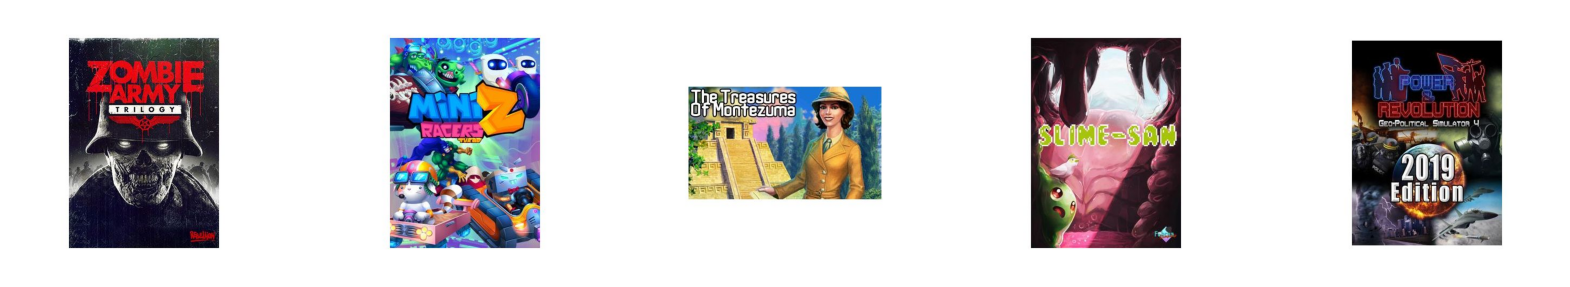

In [272]:
NB_IMAGES = 5
CATEGORIE_TO_DISPLAY = 2905

images_per_cat = get_images_per_category(NB_IMAGES)
images_to_display = [imagename for imagename in images_per_cat[images_per_cat["prdtypecode"] == CATEGORIE_TO_DISPLAY]["imagename"]]

fig = plt.figure(figsize=(20, 10))
for i, image in enumerate(images_to_display):
    img = np.asarray(Image.open(IMG_DIR + image))
    ax = fig.add_subplot(1, NB_IMAGES, i + 1)
    ax.imshow(img)

format_axes(fig)

print(images_per_cat["prdtypecode"].unique())


#### Afficher quelle classe de produit à le plus d'images avec des bandes blanches

In [103]:
from IPython.display import clear_output

def display_img(img):
    # Create a figure and set the background to be transparent so we can see the white borders
    fig = plt.figure(figsize=(10, 10), layout="constrained")
    fig.patch.set_alpha(0.0)
    for i, filename in enumerate(random_images):
        ax = fig.add_subplot(FIG_ROWS, FIG_COLS, i + 1)
        ax.imshow(img)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.grid(False)

def has_white_bands(nb_pixels, img):
    top_is_white =img[:nb_pixels].mean() == 255
    bottom_is_white =img[-nb_pixels:].mean() == 255
    left_is_white =img[:, :nb_pixels].mean() == 255
    right_is_white =img[:, -nb_pixels:].mean() == 255

    return top_is_white or bottom_is_white or left_is_white or right_is_white

NB_PIXELS = 5

# Store the name of each file in a list
images_filename = [get_image_name(productid, imageid) for productid, imageid in zip(df["productid"], df["imageid"])]

def read_check_image(nb_pixels, filename, i, i_total):
    i+=1
    img = np.asarray(Image.open(IMG_DIR + filename))
    if(i%500 == 0):
        clear_output(wait=True)
        print("Avancement :", np.round(i / i_total * 100, 2), "%")
    return has_white_bands(nb_pixels, img)
i_total = df["productid"].count()
has_white_bands = [read_check_image(NB_PIXELS, filename, i, i_total) for i, filename in enumerate(images_filename)]

# # Example d'une image sans ligne ou colonne blanche avec un nombre de pixels de 5
# test_images = ['image_1285980297_product_4071437772.jpg', "image_1295708759_product_4126964804.jpg", "image_1209321641_product_3363087451.jpg", "image_1289401289_product_4087644461.jpg"]
# test_results = [0, 1, 1, 0]
# # Note : la dernière image à des bordures grises


Avancement : 99.51 %


In [88]:
df["white_bands"] = has_white_bands
df["white_bands"].value_counts()

True     73028
False    11888
Name: white_bands, dtype: int64

### Répartition des images sans bande blanche par catégorie

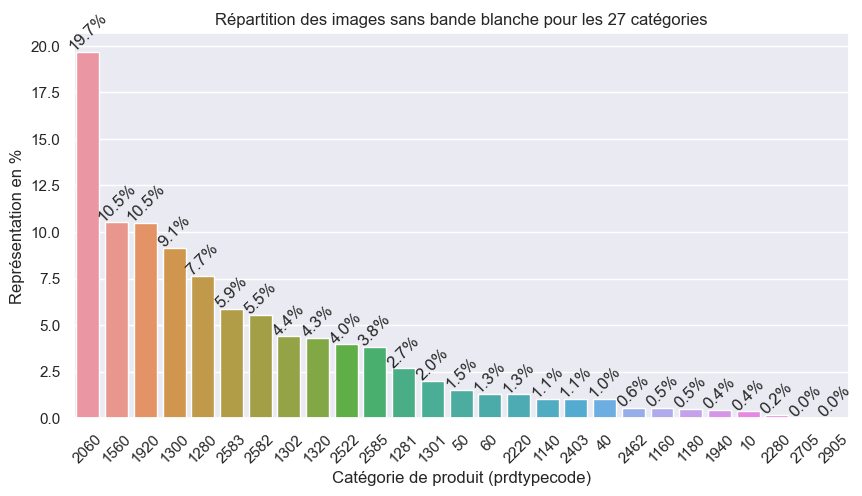

In [96]:
df_none_white = df[df["white_bands"] == False]

prdtypecode_proportion = pd.DataFrame(df_none_white["prdtypecode"].value_counts(normalize=True)).reset_index()
prdtypecode_proportion.rename(columns = {"prdtypecode": "count", "index":"prdtypecode"}, inplace=True)
prdtypecode_proportion = prdtypecode_proportion.astype({"prdtypecode":"str"})

nb_categories = len(prdtypecode_proportion.index)

ax = sns.barplot(x=prdtypecode_proportion["prdtypecode"], y=prdtypecode_proportion["count"]*100)
patches = ax.patches
for i in range(len(patches)):
    x = patches[i].get_x() + patches[i].get_width()/2
    y = patches[i].get_height()+.05
    ax.annotate('{:.1f}%'.format(prdtypecode_proportion["count"][i]*100), (x, y), ha='center', rotation=45)

ax.figure.set_size_inches((10, 5))
plt.title(f"Répartition des images sans bande blanche pour les {nb_categories} catégories")
plt.xlabel("Catégorie de produit (prdtypecode)")
plt.ylabel("Représentation en %")
plt.xticks(rotation = 45);